<a href="https://colab.research.google.com/github/ShinyRyo/2022_shiny_teach/blob/main/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考
1. [【ディープラーニング入門】ニューラルネットワークとは？Pytorchで深層学習を実装する](https://www.youtube.com/watch?v=LhCBY_3kZkw&list=PL_fbLtvVldtkdcTFIygigqvlHOBaOdpnT)
1. [5分でわかる！ニューラルネットワークの仕組みと実装方法（Python）](https://blog.apar.jp/deep-learning/14708/https://)
1. [多層パーセプトロン](http://deepokayama.kenkyuukai.jp/FilePreview_Subject.asp?id=6180&sid=2063&cid=352&ref=%2Fsubject%2Fsubject%5Flist%2Easp)
1. [【3分で理解】ニューラルネットワークを解説！後編「多層パーセプトロン」とは？](https://note.com/taisuke_murata/n/nb470ea2eaa8e)
1. [高卒でもわかる機械学習 (3) 多層パーセプトロン](http://hokuts.com/2015/12/04/ml3-mlp/https://)
1. [パーセプトロンによるXOR実装の可視化を入り口にして、ニューラルネットワークの基礎を理解する](https://qiita.com/masatomix/items/42b322a8db61e5b4d65f)

#目次
1. 単層パーセプトロン(単純パーセプトロン)
1. 多層パーセプトロン(単純パーセプトロン)
1. ニューラルネットワーク

#目的
単純パーセプトロンからニューラルネットワークまで、順に実装していきます。なぜ、ニューラルネットワークを使うのかを実践的に理解する事を目的とします。

#実装（普通のPython）

##単純パーセプトロン

まずはニューロン(神経)の仕組みを基に単純なパーセプトロンから作っていきます。

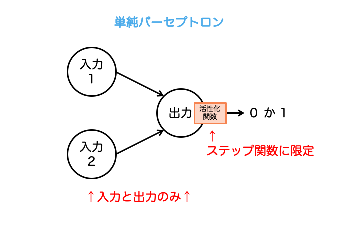

図1. 単純パーセプトロン

まずは、単純パーセプトロンでANDゲート、ORゲート、NANDゲートを作ります。構造は図1と同じですが、重み$w$やバイアス$b$が違います。構造を作る数式は以下の様になります。$x1,x2$は入力です。<br>
$y=\left\{
\begin{array}{lcl}
1\;(w_1x_1\:+\:w_2x_2+b\;\ge\:0)\\
0\;(w_1x_1\:+\:w_2x_2+b\;\lt\:0)\\
\end{array}
\right.$

上の式に入力$x1,x2$をそれぞれのゲートに入れると、下の様な出力が出てきます。この時、入力$x1,x2$をゲートに入れて計算した値をステップ関数に通して出力します。step関数については以下を参照して下さい。

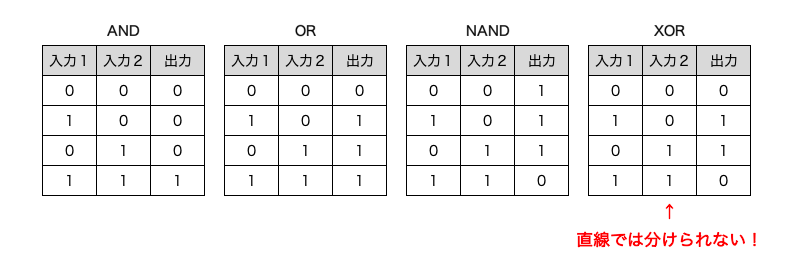

###step関数

ステップ関数は0より小さければ0、0以上であれば1を返す関数です。step関数を以下に定義します。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def step(x):
    a=0
    if x < 0:
        a=0
    else:
        a=1
    return a

###入力

ゲートに入れる入力$X(x1,x2)$を作ります。

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.DataFrame(data=np.array([[0,0],[0,1],[1,0],[1,1]]),
                  columns=['x1', 'x2'])
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


入力$x1,x2$を２次元平面に描写します。横軸を$x1$、縦軸を$x2$とします。

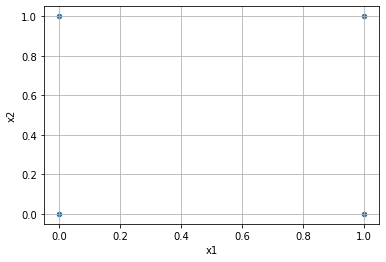

In [ ]:
X.plot(kind='scatter', x='x1', y='x2',grid=True)

###ANDゲート(done)

単純パーセプトロンによって、どのように分類されるか図示します。まず、単純パーセプトロンの式は上記でもありましたが、次の通りです。<br>
$y=\left\{
\begin{array}{lcl}
1\;(w_1x_1\:+\:w_2x_2+b\;\ge\:0)\\
0\;(w_1x_1\:+\:w_2x_2+b\;\lt\:0)\\
\end{array}
\right.$<br>
ANDゲートは重み$w$に0.5、バイアス$b$に$-0.7$を入れて次の様になる事が知られています。<br>
$y=\left\{
\begin{array}{lcl}
1\;(0.5x_1+0.5x_2-0.7\ge0)\\
0\;(0.5x_1+0.5x_2-0.7\lt0)\\
\end{array}
\right.$<br>
ANDゲートでは、出力$y$を「$0.5x_1\:+\:0.5x_2-0.7=0$」で表す事が出来る直線で分割します。<br>
次に、$x1$を$x$、$x2$を$f(x)$として、$f(x)=-x+1.4$の直線を2次元平面上に描写します。

In [ ]:
AND_df=X.copy()

In [ ]:
#この時、線形分離可能である事を２次元平面で表すためにsumを計算します。これは単純パーセプトロンの式で計算できます。
#w = np.array([0.5, 0.5])
#b = -0.7
AND_df['sum2D']=-1*AND_df['x1']+1.4
AND_df

,x1,x2,sum2D
0,0,0,1.4
1,0,1,1.4
2,1,0,0.4
3,1,1,0.4


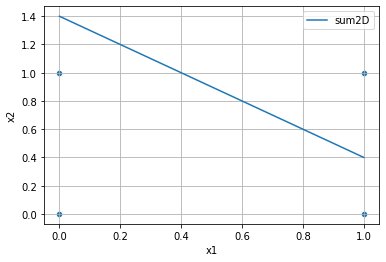

In [ ]:
ax=AND_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
AND_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

直線の上が出力１、下が出力０となります。これが先ほどから出ている<br>
$y=\left\{
\begin{array}{lcl}
1\;(0.5x_1+0.5x_2-0.7\ge0)\\
0\;(0.5x_1+0.5x_2-0.7\lt0)\\
\end{array}
\right.$<br>
を２次元平面で表現したものです。<br>
これはstep関数を用いる事で実装出来ます。実際に式に入力$X$を入れて出力の結果を見てみます。

In [ ]:
#単純パーセプトロンをANDゲートに通した時の出力yは次の様に計算できます。
w1, w2 = 0.5, 0.5
b = -0.7
AND_df['sum3D']=0.5*AND_df['x1']+0.5*AND_df['x2']-0.7
AND_df['y']=(AND_df['x1']*w1+AND_df['x2']*w2+b).map(lambda x: step(x))

In [ ]:
AND_df

,x1,x2,sum2D,sum3D,y
0,0,0,1.4,-0.7,0
1,0,1,1.4,-0.2,0
2,1,0,0.4,-0.2,0
3,1,1,0.4,0.3,1


入力が（1,1）の時、１を出力していて、それ以外の場合は０を出力しています。上手く分離されている様です。<br>
上で確認したANDゲートを関数で定義します。

In [ ]:
def AND(X:list):
    w = np.array([0.5, 0.5])#([1,1])# #伝達
    b = -0.7 #バイアス
    #下の式はsum=x1*w1+x2*w2+bと同じです。リストやnumpyを用いた書き方になっています。
    sum = np.sum(X*w) + b
    
    y=step(sum)
    return y

####TensorFlowでのANDゲートの実装1

TensorFlowでANDゲートを実装するとはどういう事か確認します。上でANDゲートは「$f(x)=0.5x_1+0.5x_2-0.7$」で表される直線で分離される事が知られている事を確認しました。ここでは、誤差逆伝搬法を使って重み$w$とバイアス$b$を機械的に求められる事を確認していきます。

In [ ]:
import tensorflow as tf
X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([0, 0, 0, 1])

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=(2,), units=1, activation='sigmoid')
])

In [ ]:
sgd=tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_tf,t_tf,epochs=1000,verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.00853177],
       [0.15170243],
       [0.1494183 ],
       [0.78497684]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[3.0162194],
        [3.0340796]], dtype=float32), array([-4.75539], dtype=float32)]

#####分離の確認

In [ ]:
a=-(model.get_weights()[0][0]/model.get_weights()[0][1])
a

array([-0.9941135], dtype=float32)

In [ ]:
intercept=-(model.get_weights()[1][0]/model.get_weights()[0][1])
intercept

array([1.5673255], dtype=float32)

In [ ]:
OR_df=X.copy()
OR_df['sum2D']=a*OR_df['x1']+intercept #2次元平面上に描写するためのデータ
OR_df

,x1,x2,sum2D
0,0,0,1.567325
1,0,1,1.567325
2,1,0,0.573212
3,1,1,0.573212


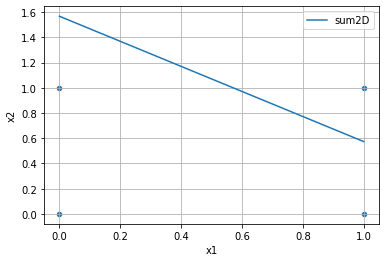

In [ ]:
ax=OR_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
OR_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

これも直線の上のエリアが出力１、下のエリアが出力０となります。ANDゲートと同じようにstep関数を使って分類します。

In [ ]:
AND_df

,x1,x2,sum2D,sum3D,y
0,0,0,1.4,-0.7,0
1,0,1,1.4,-0.2,0
2,1,0,0.4,-0.2,0
3,1,1,0.4,0.3,1


In [ ]:
AND_df['sum3D_2']=model.get_weights()[0][0]*AND_df['x1']+model.get_weights()[0][1]*AND_df['x2']+model.get_weights()[1][0]
AND_df

,x1,x2,sum2D,sum3D,y,sum3D_2
0,0,0,1.4,-0.7,0,-4.755390
1,0,1,1.4,-0.2,0,-1.721311
2,1,0,0.4,-0.2,0,-1.739171
3,1,1,0.4,0.3,1,1.294909


####tensorflowでのANDゲートの実装2

In [ ]:
import tensorflow as tf
X_tf=tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]])
t_tf=tf.constant([0, 0, 0, 1])
t_train = tf.keras.utils.to_categorical(t_tf, 2)

In [ ]:
t_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
#モデル、損失関数、最適化
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=(2,), units=2, activation=None)
])
optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[ 0.88470876, -0.20387197],
        [-0.86316097,  0.94256485]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [ ]:
model.fit(X_tf,t_train,epochs=1000, verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 1.2499977 , -0.24999925],
       [ 0.7499994 ,  0.25000006],
       [ 0.7499994 ,  0.25000006],
       [ 0.25000113,  0.7499994 ]], dtype=float32)>

In [ ]:
np.argmax(model(X_tf), axis=1)

array([0, 0, 0, 1])

In [ ]:
model.get_weights()

[array([[-0.4999983,  0.4999993],
        [-0.4999983,  0.4999993]], dtype=float32),
 array([ 1.2499977 , -0.24999925], dtype=float32)]

####PyTorchでのANDゲートの実装1

In [ ]:
import torch
X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([[0],[0],[0],[1]])

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid(), #sigmoidを入れるだけで大丈夫
)

In [ ]:
model(X_pt)

tensor([[0.5261],
        [0.5370],
        [0.4267],
        [0.4373]], grad_fn=<SigmoidBackward>)

In [ ]:
loss_fn = nn.BCELoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt.float())
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.0087],
        [0.1517],
        [0.1510],
        [0.7839]], grad_fn=<SigmoidBackward>)

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[3.0099, 3.0153]])),
             ('0.bias', tensor([-4.7370]))])

#####分離の確認

In [ ]:
a=(model.state_dict()['0.weight'][0][1]/model.state_dict()['0.weight'][0][0]).item()

In [ ]:
intercept=(model.state_dict()['0.bias'].item()/model.state_dict()['0.weight'][0][0]).item()

In [ ]:
OR_df=X.copy()
OR_df['sum2D']=-a*OR_df['x1']-intercept #2次元平面上に描写するためのデータ
OR_df

,x1,x2,sum2D
0,0,0,1.573805
1,0,1,1.573805
2,1,0,0.571992
3,1,1,0.571992


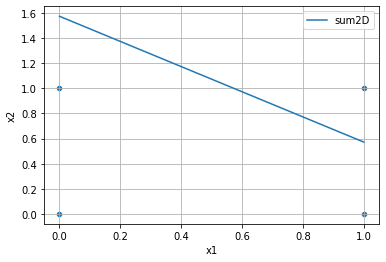

In [ ]:
ax=OR_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
OR_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
(model.state_dict()['0.weight'][0][0].item()**AND_df['x1']
 +model.state_dict()['0.weight'][0][1].item()*AND_df['x2']
 +model.state_dict()['0.bias'][0].item()
)

0   -3.736979
1   -0.721632
2   -1.727090
3    1.288258
dtype: float64

In [ ]:
AND_df['sum3D_2']=model.state_dict()['0.weight'][0][0].item()*AND_df['x1']\
                   +model.state_dict()['0.weight'][0][1].item()*AND_df['x2']\
                   +model.state_dict()['0.bias'][0].item()
AND_df

,x1,x2,sum2D,sum3D,y,sum3D_2
0,0,0,1.4,-0.7,0,-4.736979
1,0,1,1.4,-0.2,0,-1.721632
2,1,0,0.4,-0.2,0,-1.727090
3,1,1,0.4,0.3,1,1.288258


####PyTorchでのANDゲートの実装2

In [ ]:
import torch
import torch.nn.functional as f

X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([0,0,0,1])

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,2),
        nn.Softmax(dim=1),
)

In [ ]:
model(X_pt)

tensor([[0.2969, 0.7031],
        [0.3368, 0.6632],
        [0.3655, 0.6345],
        [0.4092, 0.5908]], grad_fn=<SoftmaxBackward0>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt.float())
    loss = loss_fn(y,t_pt.long())
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.9919, 0.0081],
        [0.8512, 0.1488],
        [0.8514, 0.1486],
        [0.2110, 0.7890]], grad_fn=<SoftmaxBackward0>)

In [ ]:
np.argmax(model(X_pt).detach().numpy(), axis=1)

NameError: ignored

In [ ]:
model.state_dict()

##ORゲート(done)

####TensorFlowでのORゲートの実装1

同じようにORゲートとNANDゲートを見ていきます。

ORゲートの式は<br>
$y=\left\{
\begin{array}{lcl}
1\;(0.5x_1\:+\:0.5x_2-0.2\;\ge\:0)\\
0\;(0.5x_1\:+\:0.5x_2-0.2\;\lt\:0)\\
\end{array}
\right.$<br>
です。<br>

In [ ]:
import tensorflow as tf
X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([0,1,1,1])

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=(2,), units=1, activation='sigmoid')
])

In [ ]:
sgd=tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='binary_crossentropy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_tf,t_tf,epochs=1000,verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.18790023],
       [0.92173034],
       [0.93268913],
       [0.99858415]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[4.0924635],
        [3.929805 ]], dtype=float32), array([-1.4637121], dtype=float32)]

#####分離の確認

In [ ]:
a=-(model.get_weights()[0][0]/model.get_weights()[0][1])

In [ ]:
a

array([-1.041391], dtype=float32)

In [ ]:
intercept=-(model.get_weights()[1]/model.get_weights()[0][1])

In [ ]:
intercept

array([0.3724643], dtype=float32)

In [ ]:
X = pd.DataFrame(data=np.array([[0,0],[0,1],[1,0],[1,1]]),
                  columns=['x1', 'x2'])

In [ ]:
OR_df=X.copy()
OR_df['sum2D']=a*OR_df['x1']+intercept #2次元平面上に描写するためのデータ
OR_df

,x1,x2,sum2D
0,0,0,0.372464
1,0,1,0.372464
2,1,0,-0.668927
3,1,1,-0.668927


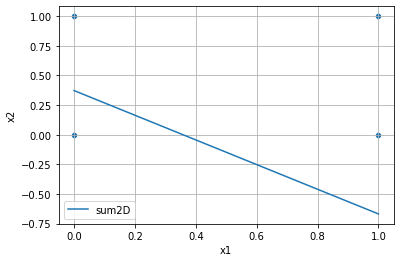

In [ ]:
ax=OR_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
OR_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

これも直線の上のエリアが出力１、下のエリアが出力０となります。ANDゲートと同じようにstep関数を使って分類出来ます。

In [ ]:
OR_df['sum3D_2']=model.get_weights()[0][0]*OR_df['x1']+model.get_weights()[0][1]*OR_df['x2']+model.get_weights()[1][0]
OR_df

,x1,x2,sum2D,sum3D_2
0,0,0,0.372464,-1.463712
1,0,1,0.372464,2.466093
2,1,0,-0.668927,2.628751
3,1,1,-0.668927,6.558556


###TensorFlowでのORゲート2

In [ ]:
import tensorflow as tf
X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([0,1,1,1])
t_train=tf.keras.utils.to_categorical(t_tf, 2)

In [ ]:
t_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=(2,), units=2, activation='softmax')
])
sgd=tf.keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.5       , 0.5       ],
       [0.73822856, 0.26177138],
       [0.33929557, 0.66070443],
       [0.5915429 , 0.40845716]], dtype=float32)>

In [ ]:
model.compile(optimizer=sgd, loss='categorical_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_tf, t_train, epochs=1000, verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[8.9826083e-01, 1.0173917e-01],
       [4.0825263e-02, 9.5917469e-01],
       [3.9652050e-02, 9.6034801e-01],
       [1.9900658e-04, 9.9980098e-01]], dtype=float32)>

In [ ]:
np.argmax(model(X_tf), axis=1)

array([0, 1, 1, 1])

In [ ]:
model.get_weights()

[array([[-3.5421908,  1.8230104],
        [-3.1786287,  2.1561916]], dtype=float32),
 array([ 1.0890242, -1.0890238], dtype=float32)]

###PyTorchでのORゲートの実装

In [ ]:
import torch
X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([[0],[1],[1],[1]])

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid(),
)

In [ ]:
model(X_pt)

tensor([[0.5339],
        [0.6380],
        [0.3766],
        [0.4817]], grad_fn=<SigmoidBackward>)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt)
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.1896],
        [0.9288],
        [0.9242],
        [0.9985]], grad_fn=<SigmoidBackward>)

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[3.9530, 4.0204]])),
             ('0.bias', tensor([-1.4524]))])

####分離の確認

In [ ]:
a=-(model.state_dict()['0.weight'][0][0]/model.state_dict()['0.weight'][0][1]).item()
a

-0.9832366108894348

In [ ]:
intercept=(-model.state_dict()['0.bias'][0]/model.state_dict()['0.weight'][0][1]).item()
intercept

0.36125239729881287

In [ ]:
OR_df=X.copy()
OR_df['sum2D']=a*OR_df['x1']+intercept #2次元平面上に描写するためのデータ
OR_df

,x1,x2,sum2D
0,0,0,0.361252
1,0,1,0.361252
2,1,0,-0.621984
3,1,1,-0.621984


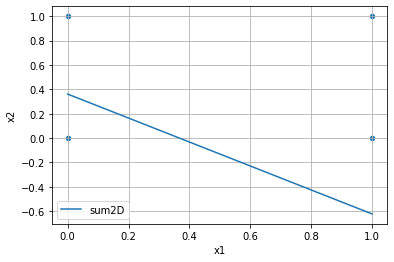

In [ ]:
ax=OR_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
OR_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )



これも直線の上のエリアが出力１、下のエリアが出力０となります。ANDゲートと同じようにstep関数を使って分類します。

In [ ]:
OR_df['sum3D_2']=model.state_dict()['0.weight'][0][0].item()*OR_df['x1']\
                   +model.state_dict()['0.weight'][0][1].item()*OR_df['x2']\
                   +model.state_dict()['0.bias'][0].item()
OR_df

,x1,x2,sum2D,sum3D_2
0,0,0,0.361252,-1.452382
1,0,1,0.361252,2.568025
2,1,0,-0.621984,2.500629
3,1,1,-0.621984,6.521036


###PyTorchでのORゲートの実装2

In [ ]:
import torch
import torch.nn.functional as f

X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([0,1,1,1]).long() 

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,2),
)

In [ ]:
model(X_pt)

tensor([[ 0.4228,  0.3833],
        [-0.0607, -0.2737],
        [ 0.7720,  0.0049],
        [ 0.2885, -0.6522]], grad_fn=<AddmmBackward>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt)
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[ 1.4862, -0.6801],
        [-1.7499,  1.4155],
        [-1.1898,  1.9667],
        [-4.4259,  4.0622]], grad_fn=<AddmmBackward>)

In [ ]:
np.argmax(model(X_pt).detach().numpy(), axis=1)

array([0, 1, 1, 1])

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-2.6759, -3.2361],
                      [ 2.6467,  2.0955]])),
             ('0.bias', tensor([ 1.4862, -0.6801]))])

##多層パーセプトロン

###XORゲート

上で確認した通り、ANDゲート、ORゲート、NANDゲートは直線で分ける事が出来ます。この事を「線形分離可能」と言います。線形分離可能な事象は単純パーセプトロンで実装出来ます。<br>
一方、XORゲートでは直線で分ける事が出来ません。この事を「線形分離不可能」と言います。線形分離不可能な事象は単純パーセプトロンで実装出来ませんが、単純パーセプトロンを組み合わせて実装出来ます。これを「多層パーセプトロン」と言います。

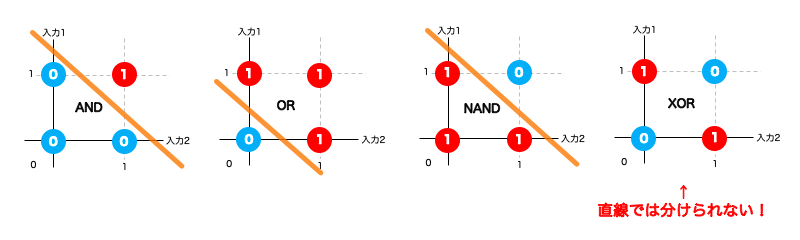

上で作ったANDゲート、ORゲート、NANDゲートを使ってXORゲートを実装します。

In [ ]:
def XOR(X):
    s1=NAND(X)
    s2=OR(X)
    S=[s1,s2]
    y = AND(S)
    return y

In [ ]:
for x in X.values:
    print(f"入力:{x}の時、出力は")
    print(XOR(x))

入力:[0 0]の時、出力は


NameError: ignored

上手く分類できています。これは次の図の様に非線形に分離している事を表しています。

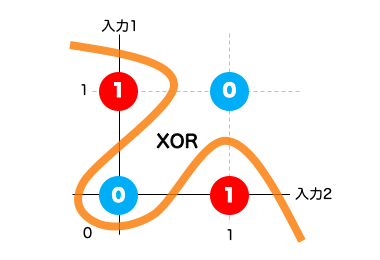

上の図は模式的な物です。実際、どのように分離しているのかを３次元空間で見てみます。

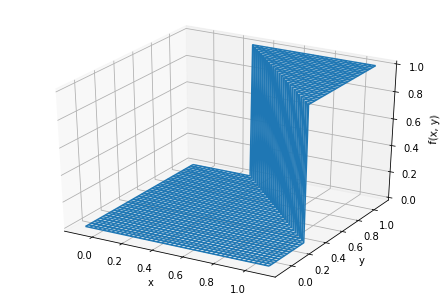

In [3]:
import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
 
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))
 
def step_function(x):
    """
    やってることは
    if x <= 0:
      return 0
    elif x > 0:
      return 1
    だけど、np.arrayを引数に取れるバージョン
    :param x:
    :return:
    """
    return np.array(x > 0, dtype=np.int)
 
 
def h(x):
    return step_function(x)
    # return sigmoid(x)
 
 
def XOR_3d(X, Y):
    n = NAND(X, Y)
    n = h(n)
    o = OR(X, Y)
    o = h(o)
 
    a = AND(n, o)
    a = h(a)
 
    return a
 
def AND_3d(X, Y):
    a = AND(X, Y)
    a = h(a)
 
    return a

def perceptron(x1, x2, w1, w2, b):
    return w1 * x1 + w2 * x2 + b
 
 
def AND(x1, x2):
    # (1,1)(x1,x2) - 1.4 = 0 な直線
    return perceptron(x1, x2, w1=0.5, w2=0.5, b=-0.7)
 
 
def NAND(x1, x2):
    # (1,1)(x1,x2) - 1.4 = 0 な直線
    return perceptron(x1, x2, w1=-0.5, w2=-0.5, b=0.7)
 
 
def OR(x1, x2):
    # (1,1)(x1,x2) - 1.4 = 0 な直線
    return perceptron(x1, x2, w1=0.5, w2=0.5, b=-0.2)
 
 
def main():
    x = np.arange(-0.1, 1.1, 0.01)
    y = np.arange(-0.1, 1.1, 0.01)
 
    X, Y = np.meshgrid(x, y)
    #Z = XOR_3d(X, Y)
    Z = AND_3d(X, Y)
 
    fig = plt.figure()
    ax = Axes3D(fig)
 
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
 
    # ax.plot_surface(X, Y, Z, alpha=0.3)
    ax.plot_wireframe(X, Y, Z)
 
    plt.show()
 
 
if __name__ == "__main__":
    main()

#なぜニューラルネットワークを使うのか？

　上では単純パーセプトロンを実装し、直線で分離できる事を確認しました。また、単純パーセプトロンの組み合わせで線形分離不可能な事象を多層パーセプトロンを実装して分離できる事も確認しました。ここからニューラルネットワークを実装する事で、重みやバイアスを機械的に求められる事を確認していきます。

###簡単なパーセプトロンの実装

まずは上で実装した、ANDゲート、ORゲート、NANDゲートを確認します。これらは「$f(x)=w_1x_1\:+\:w_2x_2+b$」にそれぞれ重み$w$とバイアス$b$を入れた物でした。

In [ ]:
def AND(X:list):
    w = np.array([0.5, 0.5])#([1,1])# #伝達
    b = -0.7 #バイアス
    #下の式はsum=x1*w1+x2*w2+bと同じです。リストやnumpyを用いた書き方になっています。
    sum = np.sum(X*w) + b
    
    y=step(sum)
    return y

In [ ]:
def OR(X: list):
    w = np.array([0.5, 0.5])#([1,1])# #重みとバイアスだけがANDと違う
    b = -0.2 #バイアス
    a=0
 
    sum = np.sum(X*w) + b
 
    y=step(sum)
 
    return y

In [ ]:
def NAND(X: list):
    w = np.array([-0.5, -0.5])#([1,1])# #重みとバイアスだけがANDと違う
    b = 0.7 #バイアス
    a=0
 
    sum = np.sum(X*w) + b
 
    y=step(sum)
 
    return y

###参考

In [ ]:
AND(X[3])

1

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def identity_function(x):
    return x

In [ ]:
def init_network():
    network = {}
    network["W1"]=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network["b1"]=np.array([0.1,0.2,0.3])
    network["W2"]=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network["b2"]=np.array([0.1,0.2])
    network["W3"]=np.array([[0.1,0.3],[0.2,0.4]])
    network["b3"]=np.array([0.1,0.2])
    return network

In [ ]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [ ]:
network = init_network()
x=np.array([1.0, 0.5])
y=forward(network, x)
print(y)

[0.31682708 0.69627909]


In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

In [ ]:
np.exp(2)

7.38905609893065

##1.ディープラーニング入門


###1-1.単純パーセプトロン（人工ニューロン）

次に、学習するとはどういう事かを見ていきます。まずは、上で実装した、AND回路とOR回路について学習していきます。

ここで、単純パーセプトロンとは何かを改めて確認します。単純パーセプトロンとは、ある入力の大きさが閾値以上であれば一定の出力を発するという仕組み（McCulloch-Pittsモデル）のもと作られた、単層のアルゴリズムです。

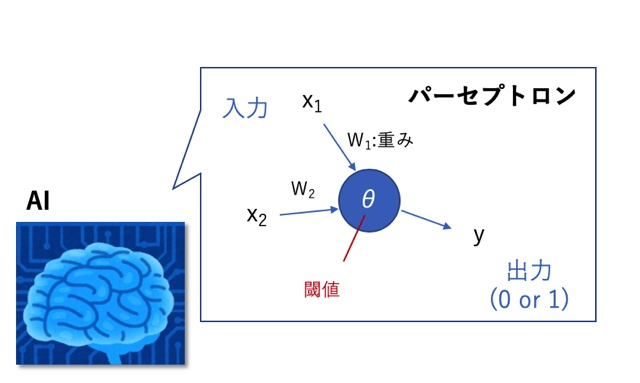

$w_1x1+w_2x2$<br>
$\rightarrow \theta$より大きいなら、$y=1$<br>
$\rightarrow\theta$以下なら、$y=0$<br>

McCulloch-Pittsモデルとは重み付きの入力の総和が閾値より大きければ「１」を、閾値以下であれば「０」を出力するのというモデルです。

例えば、上の図のようにx1,x2という入力が単純パーセプトロンに入った場合、それぞれに重みをかけて足した数値が閾値（θ）より大きいか、そうでないかによって出力が決まるのです。

単純パーセプトロンは非常に単純な構造ですが、これを組み合わせてネットワーク構造を形成することによって、様々な出力を表現することができるようになるのです（これを実感できるのはもう少し後になりますが）。

パーセプトロン<br>
入力、線形結合、閾値

重みづけを変えれば論理回路も変わる

##1-1.ニューラルネットワーク

$$
y=
\left\{
\begin{array}{lcl}
1\;(w_1x_1\:+\:w_2x_2\;\ge\:\theta)\\
0\;(w_1x_1\:+\:w_2x_2\;\lt\:\theta)\\
\end{array}
\right.
$$

$\theta$の代わりにバイアス$b$を使って

$$
y=
\left\{
\begin{array}{lcl}
1\;(w_1x_1\:+\:w_2x_2\;+\:b\:\ge\:0)\\
0\;(w_1x_1\:+\:w_2x_2\;+\:b\:\lt\:0)\\
\end{array}
\right.
$$

シグモイド関数

$$
\sigma(x)=\frac 1 {1+e^{-2}}
$$

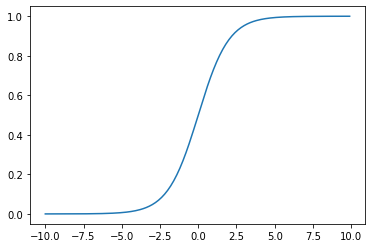

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.arange(-10,10,0.1)
plt.plot(x, sigmoid(x))

$y=\sigma(w_1x_1+w_2x_2+b)$

次にORゲートを作ります。<br>
まず、入力$X$、教師データ$t$を作ります。

In [ ]:
import torch

X=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t=torch.Tensor([[0],[1],[1],[1]])

今回は$t$を教師データとして使います。予測した答えは$y$を使います。

In [ ]:
t

tensor([[0.],
        [1.],
        [1.],
        [1.]])

ORゲートを実装します。Linearを使って、入力が2次元、出力が1次元のモデルを作ります。

In [ ]:
from torch import nn
model=nn.Sequential(
    nn.Linear(2,1),
)

先程、作ったモデルに$X$を入力します。

In [ ]:
model(X)

tensor([[-0.2768],
        [-0.4170],
        [-0.6548],
        [-0.7950]], grad_fn=<AddmmBackward>)

In [ ]:
y

tensor([[-0.3845],
        [-0.0448],
        [-0.0601],
        [ 0.2796]], grad_fn=<AddmmBackward>)

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.3780, -0.1402]])),
             ('0.bias', tensor([-0.2768]))])

##1-2.学習の方法

損失関数として平均二乗誤差を定義します

$$
E(w_1,w_2,b)=\frac{1}{4}\sum^3_{n=0}(t_n-y_n)^2
$$

In [ ]:
loss_fn=nn.MSELoss()
loss_fn(y,t)

tensor(2.0112, grad_fn=<MseLossBackward>)

実際の学習には勾配降下法を使います。上式の$w_1,w_2,b$について微分していき、損失関数が最小になる時の傾きをそれぞれ求めます。この時、$w_1,w_2,b$についてそれぞれ微分していくことを偏微分と言います。$\eta$は学習率です。$\eta$は$0～1$の値を取ります。

$$
w_1\leftarrow w_1- \eta\frac{\partial E(w_1,w_2,b)}{\partial w_1}\\
w_2\leftarrow w_2- \eta\frac{\partial E(w_1,w_2,b)}{\partial w_2}\\
b\rightarrow b-\eta\frac{\partial E(w_1,w_2,b)}{\partial b}\\
$$

勾配降下法を実装します。詳細は[こちら](https://youtu.be/q933reMpvX8)をご覧下さい。

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

訓練します。

In [ ]:
model.train()
for epoch in range(5000):
    optimizer.zero_grad()
    y=model(X)
    loss = loss_fn(y,t)

    loss.backward()
    optimizer.step()

入力$X$に対する予測値$y$を見てみます。

In [ ]:
model(X)

tensor([[0.2500],
        [0.7500],
        [0.7500],
        [1.2500]], grad_fn=<AddmmBackward>)

教師データ$t$を見てみます。

In [ ]:
t

tensor([[0.],
        [1.],
        [1.],
        [1.]])

先程に比べて上手く予測出来ている様です。

損失関数も見てみます

In [ ]:
loss_fn(model(X), t)

tensor(0.0065, grad_fn=<MseLossBackward>)

モデルの構造通り損失関数も小さくなっています。

重みとバイアスも見てみます。上記の様にORゲートの重みは「$0.5x_1+0.5x_2-0.2=0$」の式に見られる様に知られています。

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[7.4152e-08, 7.4181e-08]])),
             ('0.bias', tensor([0.2500]))])

学習の結果、概ね知られている重さとバイアスに近付いている様です。学習を続けると重み0.5、バイアス-0.2に収束すると考えられます。

##XORゲート

次にXORゲートを作ります。

ORゲートの時の様にまずは入力$X$、教師データ$t$を作ります。

In [ ]:
import torch

X=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t=torch.Tensor([[0],[1],[1],[0]])

次にモデルを作ります。PyTorchでは、まず核となるモデルを作ります。それに、損失関数、誤差逆伝搬法、

In [ ]:
from torch import nn

model=nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
loss_fn=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
model.train()
for epoch in range(30000):
    optimizer.zero_grad()
    y=model(X)
    loss = loss_fn(y,t)

    loss.backward()
    optimizer.step()

In [ ]:
model(X)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

先程と違い全く学習できていません。

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-1.3358e-07, -1.3309e-07]])),
             ('0.bias', tensor([8.8945e-08]))])

中間層を入れます。学習回数も増やして学習します。

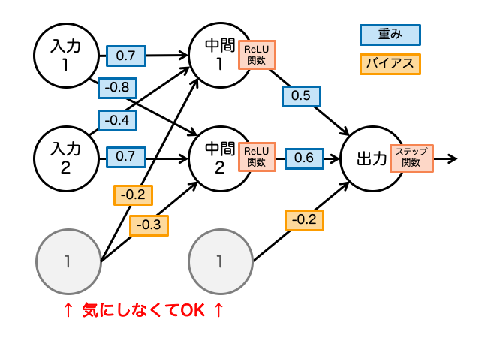

In [ ]:
from torch import nn
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1),
    nn.Sigmoid(),
)
loss_fn=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
model.train()
for epoch in range(30000):
    optimizer.zero_grad()
    y=model(X)
    loss = loss_fn(y,t)

    loss.backward()
    optimizer.step()

In [ ]:
model(X)

tensor([[0.0899],
        [0.9169],
        [0.9283],
        [0.0792]], grad_fn=<SigmoidBackward0>)

#cut

In [ ]:
t

tensor([[0.],
        [1.],
        [1.],
        [0.]])

上手く学習出来ました。

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-3.3945,  7.0880],
                      [-4.1014, -6.9328]])),
             ('0.bias', tensor([2.2089, 0.7046])),
             ('2.weight', tensor([[-4.0762, -5.3525]])),
             ('2.bias', tensor([4.0771]))])

#Keras(TensorFlow)の実装

##単純パーセプトロン

ここでは、PyTorchを使ってニューラルネットワークを実装していきます。まずはニューロン(神経)の仕組みを基に単純なパーセプトロンから作っていきます。

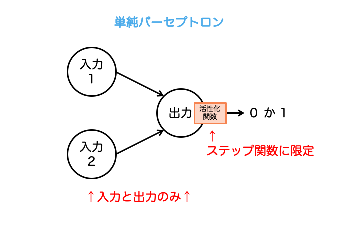

図1. 単純パーセプトロン

In [ ]:
import tensorflow as tf

X=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t=tf.constant([[0],[1],[1],[1]])

In [ ]:
X

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int32)>

今回は$t$を教師データとして使います。予測した答えは$y$を使います。

In [ ]:
t

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[0],
       [1],
       [1],
       [1]], dtype=int32)>

ORゲートを実装します。Linearを使って、入力が2次元、出力が1次元のモデルを作ります。

In [ ]:
model=tf.keras.models.Sequential([
    # tf.keras.layers.Dense(input_shape=(2,),units=2, activation='linear'),
    tf.keras.layers.Dense(input_shape=(2,),units=1, activation='sigmoid'),
])

先程、作ったモデルに$X$を入力します。

In [ ]:
model(X)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.5       ],
       [0.35390377],
       [0.37086448],
       [0.24408111]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[-0.52851003],
        [-0.6019234 ]], dtype=float32), array([0.], dtype=float32)]

##1-2.学習の方法

損失関数として平均二乗誤差を定義します

$$
E(w_1,w_2,b)=\frac{1}{4}\sum^3_{n=0}(t_n-y_n)^2
$$

実際の学習には勾配降下法を使います。上式の$w_1,w_2,b$について微分していき、損失関数が最小になる時の傾きをそれぞれ求めます。この時、$w_1,w_2,b$についてそれぞれ微分していくことを偏微分と言います。$\eta$は学習率です。$\eta$は$0～1$の値を取ります。

$$
w_1\leftarrow w_1- \eta\frac{\partial E(w_1,w_2,b)}{\partial w_1}\\
w_2\leftarrow w_2- \eta\frac{\partial E(w_1,w_2,b)}{\partial w_2}\\
b\rightarrow b-\eta\frac{\partial E(w_1,w_2,b)}{\partial b}\\
$$

勾配降下法を実装します。詳細は[こちら](https://youtu.be/q933reMpvX8)をご覧下さい。

In [ ]:
#コンパイル
learning_rate = 0.1
sgd = tf.keras.optimizers.SGD(lr=learning_rate)

model.compile(optimizer=sgd, loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


訓練します。

In [ ]:
model.fit(X, t,epochs=5000, verbose=0)

入力$X$に対する予測値$y$を見てみます。

In [ ]:
model(X)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.1224202 ],
       [0.9249163 ],
       [0.924927  ],
       [0.99908173]], dtype=float32)>

教師データ$t$を見てみます。

In [ ]:
t

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[0],
       [1],
       [1],
       [1]], dtype=int32)>

先程に比べて上手く予測出来ている様です。

PyTorchの時と同じく、重みとバイアスも見てみます。ORゲートの重みは「$0.5x_1+0.5x_2-0.2=0$」の式に見られる様に知られていました。

In [ ]:
model.get_weights()

[array([[4.4809623],
        [4.4808087]], dtype=float32), array([-1.9697086], dtype=float32)]

学習の結果、TensorFlowでもPyTorhの時と同じく、知られている重さとバイアスに近付いている様です。TensorFlowでも学習を続けると重み0.5、バイアス-0.2に収束すると考えられます。

###XORゲート

次にXORゲートを作ります。

ORゲートの時の様にまずは入力$X$、教師データ$t$を作ります。

In [ ]:
import tensorflow  as tf

X=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t=tf.constant([[0],[1],[1],[0]])

次にモデルを作ります。TensorFlowでは、まず核となるモデルを作ります。それに、損失関数、誤差逆伝搬法、をcompileします。

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_shape=(2,),units=1, activation='sigmoid'),
])

In [ ]:
SDG=tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=SDG, loss='mean_squared_error')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,t,epochs=5000,verbose=0)

In [ ]:
model(X)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.50000334],
       [0.50000054],
       [0.5000005 ],
       [0.49999774]], dtype=float32)>

先程と違い全く学習できていません。

In [ ]:
model.get_weights()

[array([[-1.1460563e-05],
        [-1.1185677e-05]], dtype=float32),
 array([1.3412973e-05], dtype=float32)]

##1.3「ディープ」ラーニングする意味(20:00～)

中間層を入れます。学習回数も増やして学習します。

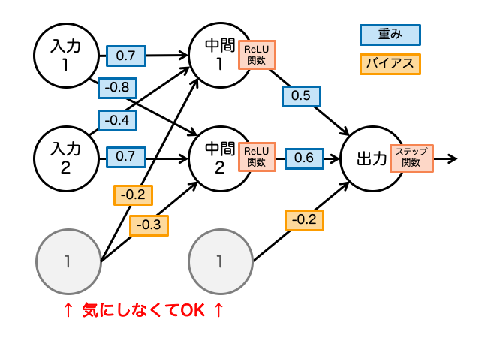

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_shape=(2,), units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [ ]:
sgd=tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 2)                 6         
                                                                 
 dense_29 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, t, epochs=1000, verbose=0)

In [ ]:
from torch import nn
from torch import optim
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1),
    nn.Sigmoid(),
)

optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
!pip install torchinfo -q

In [ ]:
from torchinfo import summary
summary(
    model,
    input_size=(1, 2, 2),
    col_names=["output_size", "num_params"],
)

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Linear: 1-1                            [1, 2, 2]                 6
├─Sigmoid: 1-2                           [1, 2, 2]                 --
├─Linear: 1-3                            [1, 2, 1]                 3
├─Sigmoid: 1-4                           [1, 2, 1]                 --
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
model.train()
for epoch in range(3000):
    optimizer.zero_grad()
    y=model(X)
    loss = loss_fn(y,t)

    loss.backward()
    optimizer.step()

RuntimeError: ignored

In [ ]:
model.fit(X,t,epochs=30000,verbose=0)

In [ ]:
model(X)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.03872086],
       [0.9657429 ],
       [0.96576995],
       [0.0359792 ]], dtype=float32)>

In [ ]:
t

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[0],
       [1],
       [1],
       [0]], dtype=int32)>

上手く学習出来ました。

In [ ]:
model.get_weights()

[array([[5.9631286, 4.1076493],
        [5.95034  , 4.104474 ]], dtype=float32),
 array([-2.5749948, -6.3064938], dtype=float32),
 array([[ 8.286236],
        [-8.950569]], dtype=float32),
 array([-3.781963], dtype=float32)]

##tensorflow

http://marupeke296.com/IKDADV_DL_No9_xor.html

https://algorithm.joho.info/machine-learning/python-keras-neural-network-and-or/

先ほどはPyTorchで実装しました。次はTensorFlowで実装します。

In [ ]:
import tensorflow as tf
import numpy as np

X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([[0],[1],[1],[0]])

In [ ]:
X_tf

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int32)>

In [ ]:
t_tf

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[0],
       [1],
       [1],
       [0]], dtype=int32)>

In [ ]:
# モジュール読み込み
import numpy as np
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)
 
# シグモイドの単純パーセプトロン作成
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)), # 入力層 要素数１、内容「2」のタプル
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    #tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid') # 出力層 １出力。１出力の時はsoftmaxは使えない
])

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2)                 6         
                                                                 
 dense_31 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[ 0.08251509],
       [-0.14393893],
       [ 0.09546183],
       [-0.10692562]], dtype=float32)>

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1))

In [ ]:
# トレーニング
model.fit(X_tf, t_tf, epochs=5000, batch_size=1, verbose=0)

In [ ]:
# トレーニングの入力を流用して実際に分類
model.predict(X_tf, batch_size=1)

array([[0.07459375],
       [0.9187923 ],
       [0.91552556],
       [0.06705187]], dtype=float32)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.07459375],
       [0.9187923 ],
       [0.91552556],
       [0.06705187]], dtype=float32)>

In [ ]:
import tensorflow as tf
import numpy as np

X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([[0],[1],[1],[1]])

In [ ]:
# モジュール読み込み
import numpy as np
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)
 
# シグモイドの単純パーセプトロン作成
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)), # 入力層 要素数１、内容「2」のタプル
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='linear') # 出力層 １出力。１出力の時はsoftmaxは使えない
])

In [ ]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1))

In [ ]:
# トレーニング
model.fit(X_tf, t_tf, epochs=5000, batch_size=1, verbose=0)

In [ ]:
# トレーニングの入力を流用して実際に分類
model.predict(X_tf, batch_size=1)

array([[0.00347221],
       [0.9911357 ],
       [0.99007094],
       [1.0241117 ]], dtype=float32)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.00347221],
       [0.9911357 ],
       [0.99007094],
       [1.0241117 ]], dtype=float32)>

#TensorFlow2

https://hmx.hatenablog.jp/entry/2020/04/26/000000

##AND

In [ ]:
#データ
trainX = tf.constant([[0,0],[0,1],[1,0],[1,1]])
trainY = tf.constant([0,0,0,1])

In [ ]:
#モデル
model=tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(2,)),
        tf.keras.layers.Dense(units=2, activation='linear'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),                
        ])

In [ ]:
#コンパイル
learning_rate = 0.1
sgd = tf.keras.optimizers.SGD(lr=learning_rate)

model.compile(optimizer=sgd, loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#学習
history = model.fit(x=trainX, y=trainY,
                   epochs=1000, shuffle=False,
                   verbose=0)

In [ ]:
model.predict(trainX)
#  [[-0.24999964]
#  [ 0.25000003]
#  [ 0.25000003]
#  [ 0.7499997 ]]

array([[0.0050249 ],
       [0.13710889],
       [0.14042531],
       [0.83713144]], dtype=float32)

####NAND

In [ ]:
#データ
import tensorflow as tf
trainX = tf.constant([[0,0],[0,1],[1,0],[1,1]])
trainY = tf.constant([0,1,1,0])

In [ ]:
#モデル
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model=Sequential([
        tf.keras.layers.InputLayer(input_shape=(2,)),
        tf.keras.layers.Dense(units=2, activation='linear'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),                
        ])

In [ ]:
#コンパイル
from tensorflow.keras.optimizers import SGD

learning_rate = 0.1
sgd = SGD(lr=learning_rate)

model.compile(optimizer=sgd, loss='mean_squared_error')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#学習
batch_size = 4
history = model.fit(x=trainX, y=trainY,
                   epochs=1000, batch_size=batch_size, shuffle=False,
                   validation_split=0.0, verbose=0)

In [ ]:
model.predict(trainX[0:batch_size])
#  [[-0.24999964]
#  [ 0.25000003]
#  [ 0.25000003]
#  [ 0.7499997 ]]

array([[0.50315154],
       [0.5034294 ],
       [0.49715704],
       [0.49743485]], dtype=float32)

学習出来ません

In [ ]:
model=Sequential([
        tf.keras.layers.InputLayer(input_shape=(2,)),
        tf.keras.layers.Dense(units=2, activation='linear'),
        tf.keras.layers.Dense(units=2, activation='sigmoid'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),                
])

In [ ]:
#コンパイル
from tensorflow.keras.optimizers import SGD

learning_rate = 0.1
sgd = SGD(learning_rate=learning_rate)

model.compile(optimizer=sgd, loss='mean_squared_error')
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#学習
history = model.fit(x=trainX, y=trainY,
                   epochs=30000, shuffle=False,
                   verbose=0)

In [ ]:
model.predict(trainX)

array([[0.03572437],
       [0.9714211 ],
       [0.9707512 ],
       [0.02889821]], dtype=float32)

##pytorch

In [ ]:
import torch

X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([[0],[1],[1],[0]])

In [ ]:
X_pt

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [ ]:
t_pt

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [ ]:
from torch import nn
from torch import optim

model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1),
    nn.Sigmoid(),
)
loss_fn=nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
!pip install torchinfo -q

In [ ]:
from torchinfo import summary
summary(
    model,
    input_size=(1, 2, 2),
    col_names=["output_size", "num_params"],
)

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Linear: 1-1                            [1, 2, 2]                 6
├─Sigmoid: 1-2                           [1, 2, 2]                 --
├─Linear: 1-3                            [1, 2, 1]                 3
├─Sigmoid: 1-4                           [1, 2, 1]                 --
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model=model.to(device)
X_pt=X_pt.to(device)
t_pt=t_pt.to(device)

In [ ]:
model.train()
for epoch in range(30000):
    optimizer.zero_grad()
    y=model(X_pt)
    loss = loss_fn(y,t_pt)

    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.0358],
        [0.9609],
        [0.9609],
        [0.0492]], device='cuda:0', grad_fn=<SigmoidBackward>)

#sigmoid関数の挙動

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
sigmoid(0.3)

0.574442516811659

In [ ]:
tf.math.sigmoid(
    x=0.3, name=None
)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5744425>

#確認できること

1. sigmoid関数の挙動

##AND

###tensorflow

In [ ]:
import tensorflow as tf
X=tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]])
t=tf.constant([0, 0, 0, 1])
t_train = tf.keras.utils.to_categorical(t, 2)

In [ ]:
t_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
#モデル、損失関数、最適化
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=(2,), units=2, activation=None)
])
optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,t_train,epochs=1000, verbose=0)

In [ ]:
np.argmax(model(X), axis=1)

array([0, 0, 0, 1])

###PyTorch

In [ ]:
import torch
import torch.nn.functional as f

X_pt=torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
t_pt=torch.tensor([[0], [0], [0], [1]])
t_train = f.one_hot(t_pt, num_classes=2)

In [ ]:
model=torch.nn.Sequential(
    torch.nn.Linear(2,1),
)
loss_fn=torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model=model.to(device)
X_pt=X_pt.to(device)
t_train=t_train.to(device)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt.float())
    loss = loss_fn(y,t_train.float())
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([4, 1, 2])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
#モデル、損失関数、最適化
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=(2,), units=2, activation=None)
])
optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,t_train,epochs=1000, verbose=0)

In [ ]:
np.argmax(model(X), axis=1)

array([0, 0, 0, 1])

####PyTorchでのANDゲートの実装

In [ ]:
import torch
import torch.nn.functional as f

X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([0,0,0,1]).long() 

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,2),
)

In [ ]:
model(X_pt)

tensor([[ 0.0688, -0.2409],
        [ 0.7094, -0.1994],
        [ 0.3576, -0.2027],
        [ 0.9982, -0.1611]], grad_fn=<AddmmBackward>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt)
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[ 4.1744, -4.3465],
        [ 1.7351, -1.2250],
        [ 1.5575, -1.4026],
        [-0.8818,  1.7189]], grad_fn=<AddmmBackward>)

In [ ]:
np.argmax(model(X).detach().numpy(), axis=1)

array([0, 0, 0, 1])

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-2.6169, -2.4393],
                      [ 2.9439,  3.1215]])),
             ('0.bias', tensor([ 4.1744, -4.3465]))])

#Pythonによる説明

###入力

ゲートに入れる入力$X(x1,x2)$を作ります。

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.DataFrame(data=np.array([[0,0],[0,1],[1,0],[1,1]]),
                  columns=['x1', 'x2'])
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


入力$x1,x2$を２次元平面に描写します。横軸を$x1$、縦軸を$x2$とします。

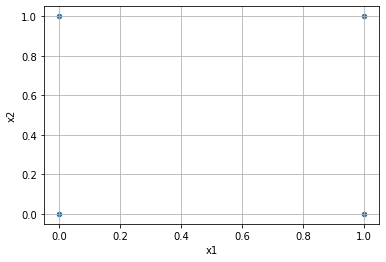

In [ ]:
X.plot(kind='scatter', x='x1', y='x2',grid=True)

###step関数

ステップ関数は0より小さければ0、0以上であれば1を返す関数です。step関数を以下に定義します。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def step(x):
    a=0
    if x < 0:
        a=0
    else:
        a=1
    return a

##単層のゲートの実装

####ANDゲート

In [ ]:
AND_df=X.copy()

In [ ]:
#この時、線形分離可能である事を２次元平面で表すためにsumを計算します。これは単純パーセプトロンの式で計算できます。
#w = np.array([0.5, 0.5])
#b = -0.7
AND_df['sum2D']=-1*AND_df['x1']+1.4
AND_df

,x1,x2,sum2D
0,0,0,1.4
1,0,1,1.4
2,1,0,0.4
3,1,1,0.4


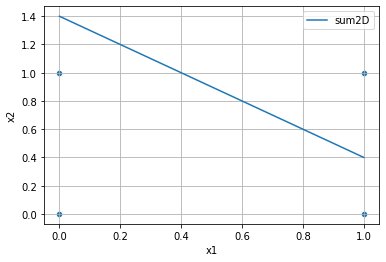

In [ ]:
ax=AND_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
AND_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
w = np.array([0.5, 0.5])
b = -0.7

In [ ]:
AND_df['sum3D']=(w[0]*AND_df['x1'])+(w[1]*AND_df['x2'])+b
AND_df

,x1,x2,sum2D,sum3D
0,0,0,1.4,-0.7
1,0,1,1.4,-0.2
2,1,0,0.4,-0.2
3,1,1,0.4,0.3


In [ ]:
AND_df["y"]=AND_df['sum3D'].map(lambda x: step(x))
AND_df

,x1,x2,sum2D,sum3D,y
0,0,0,1.4,-0.7,0
1,0,1,1.4,-0.2,0
2,1,0,0.4,-0.2,0
3,1,1,0.4,0.3,1


In [ ]:
def AND(X:list):
    w = np.array([0.5, 0.5])#([1,1])# #伝達
    b = -0.7 #バイアス
    #下の式はsum=x1*w1+x2*w2+bと同じです。リストやnumpyを用いた書き方になっています。
    sum = np.sum(X*w) + b
    
    y=step(sum)
    return y

###ORゲート

ORゲートの式は<br>
$y=\left\{
\begin{array}{lcl}
1\;(0.5x_1\:+\:0.5x_2-0.2\;\ge\:0)\\
0\;(0.5x_1\:+\:0.5x_2-0.2\;\lt\:0)\\
\end{array}
\right.$<br>
です。<br>

In [ ]:
OR_df=X.copy()

In [ ]:
#この時、線形分離可能である事を２次元平面で表すためにsumを計算します。これは単純パーセプトロンの式で計算できます。
#w = np.array([0.5, 0.5])
#b = -0.7
OR_df['sum2D']=-1*OR_df['x1']+0.4
OR_df

,x1,x2,sum2D
0,0,0,0.4
1,0,1,0.4
2,1,0,-0.6
3,1,1,-0.6


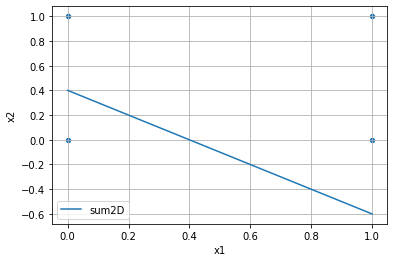

In [ ]:
ax=OR_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
OR_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
w = np.array([0.5, 0.5])
b = -0.2

In [ ]:
OR_df['sum3D']=(w[0]*OR_df['x1'])+(w[1]*OR_df['x2'])+b
OR_df

,x1,x2,sum2D,sum3D
0,0,0,0.4,-0.2
1,0,1,0.4,0.3
2,1,0,-0.6,0.3
3,1,1,-0.6,0.8


In [ ]:
OR_df["y"]=OR_df['sum3D'].map(lambda x: step(x))
OR_df

,x1,x2,sum2D,sum3D,y
0,0,0,0.4,-0.2,0
1,0,1,0.4,0.3,1
2,1,0,-0.6,0.3,1
3,1,1,-0.6,0.8,1


In [ ]:
def OR(X:list):
    w = np.array([0.5, 0.5])#([1,1])# #伝達
    b = -0.2 #バイアス
    #下の式はsum=x1*w1+x2*w2+bと同じです。リストやnumpyを用いた書き方になっています。
    sum = np.sum(X*w) + b
    
    y=step(sum)
    return y

###NANDゲート

In [ ]:
NAND_df=X.copy()

In [ ]:
#この時、線形分離可能である事を２次元平面で表すためにsumを計算します。これは単純パーセプトロンの式で計算できます。
#w = np.array([0.5, 0.5])
#b = -0.7
NAND_df['sum2D']=1*NAND_df['x1']-1.4
NAND_df

,x1,x2,sum2D
0,0,0,-1.4
1,0,1,-1.4
2,1,0,-0.4
3,1,1,-0.4


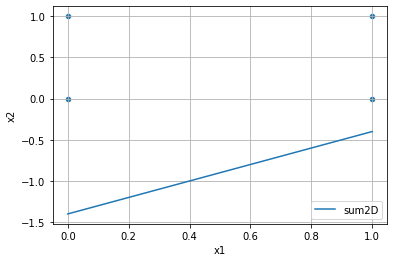

In [ ]:
ax=NAND_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
NAND_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
w = np.array([-0.5, -0.5])
b = +0.7

In [ ]:
NAND_df['sum3D']=(w[0]*NAND_df['x1'])+(w[1]*NAND_df['x2'])+b
NAND_df

,x1,x2,sum2D,sum3D
0,0,0,-1.4,0.7
1,0,1,-1.4,0.2
2,1,0,-0.4,0.2
3,1,1,-0.4,-0.3


In [ ]:
NAND_df["y"]=NAND_df['sum3D'].map(lambda x: step(x))
NAND_df

,x1,x2,sum2D,sum3D,y
0,0,0,-1.4,0.7,1
1,0,1,-1.4,0.2,1
2,1,0,-0.4,0.2,1
3,1,1,-0.4,-0.3,0


In [ ]:
def NAND(X:list):
    w = np.array([-0.5, -0.5])#([1,1])# #伝達
    b = 0.7 #バイアス
    #下の式はsum=x1*w1+x2*w2+bと同じです。リストやnumpyを用いた書き方になっています。
    sum = np.sum(X*w) + b
    
    y=step(sum)
    return y

##多層のゲートの実装

###XORゲート

In [ ]:
def XOR(X):
    s1=NAND(X)
    s2=OR(X)
    S=[s1,s2]
    y = AND(S)
    return y

In [ ]:
for x in X.values:
    print(f"入力:{x}の時、出力は{XOR(x)}")

入力:[0 0]の時、出力は0
入力:[0 1]の時、出力は1
入力:[1 0]の時、出力は1
入力:[1 1]の時、出力は0


#TensorFlowによる説明

##単層のゲートの実装

####ANDゲート

In [ ]:
import tensorflow as tf
X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([0,0,0,1])

In [ ]:
X_tf

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int32)>

In [ ]:
X_tf[0].shape

TensorShape([2])

In [ ]:
t_tf

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 0, 1], dtype=int32)>

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=X_tf[0].shape, units=1, activation='sigmoid')
])

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.5       ],
       [0.3768195 ],
       [0.24955225],
       [0.16741332]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[-1.1010017],
        [-0.5030698]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_tf, t_tf, epochs=1000, verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.00942674],
       [0.15516123],
       [0.15424642],
       [0.7787463 ]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[2.9530566],
        [2.9600523]], dtype=float32), array([-4.654733], dtype=float32)]

In [ ]:
import pandas as pd
X=pd.DataFrame(data=[[0,0],[0,1],[1,0],[1,1]],
               columns=['x1','x2']
               )

In [ ]:
AND_df_tf=X.copy()

In [ ]:
model.get_weights()[1]

array([-4.654733], dtype=float32)

In [ ]:
a=-(model.get_weights()[0][0]/model.get_weights()[0][1])
a

array([-0.9976366], dtype=float32)

In [ ]:
intercept=-(model.get_weights()[1][0]/model.get_weights()[0][1])
intercept

array([1.5725173], dtype=float32)

In [ ]:
AND_df_tf['sum2D']=a*AND_df_tf['x1']+intercept #2次元平面上に描写するためのデータ
AND_df_tf

,x1,x2,sum2D
0,0,0,1.572517
1,0,1,1.572517
2,1,0,0.574881
3,1,1,0.574881


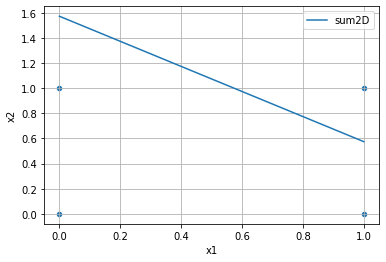

In [ ]:
ax=AND_df_tf[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
AND_df_tf[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
AND_df_tf['sum3D']=(model.get_weights()[0][0]*AND_df_tf['x1']
                    +model.get_weights()[0][1]*AND_df_tf['x2']
                    +model.get_weights()[1])
AND_df_tf

,x1,x2,sum2D,sum3D
0,0,0,1.572517,-4.654733
1,0,1,1.572517,-1.694681
2,1,0,0.574881,-1.701677
3,1,1,0.574881,1.258376


In [ ]:
AND_df_tf["y"]=AND_df_tf["sum3D"].map(lambda x: step(x))
AND_df_tf

,x1,x2,sum2D,sum3D,y
0,0,0,1.572517,-4.654733,0
1,0,1,1.572517,-1.694681,0
2,1,0,0.574881,-1.701677,0
3,1,1,0.574881,1.258376,1


####one-hotを使った分類

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=X_tf[0].shape, units=2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', epochs=1000)

TypeError: ignored

###ORゲート

In [ ]:
import tensorflow as tf
X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([0,1,1,1])

In [ ]:
X_tf

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int32)>

In [ ]:
X_tf[0].shape

TensorShape([2])

In [ ]:
t_tf

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 1, 1], dtype=int32)>

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=X_tf[0].shape, units=1, activation='sigmoid')
])

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.5       ],
       [0.44329324],
       [0.34326476],
       [0.29388577]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[-0.6487789 ],
        [-0.22780704]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_tf, t_tf, epochs=1000, verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.1930551],
       [0.9260686],
       [0.9243592],
       [0.9984395]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[3.9333847],
        [3.95809  ]], dtype=float32), array([-1.4302799], dtype=float32)]

In [ ]:
import pandas as pd
X=pd.DataFrame(data=[[0,0],[0,1],[1,0],[1,1]],
               columns=['x1','x2']
               )

In [ ]:
OR_df_tf=X.copy()

In [ ]:
model.get_weights()[1]

array([-1.4302799], dtype=float32)

In [ ]:
a=-(model.get_weights()[0][0]/model.get_weights()[0][1])
a

array([-0.99375826], dtype=float32)

In [ ]:
intercept=-(model.get_weights()[1][0]/model.get_weights()[0][1])
intercept

array([0.36135608], dtype=float32)

In [ ]:
OR_df_tf['sum2D']=a*OR_df_tf['x1']+intercept #2次元平面上に描写するためのデータ
OR_df_tf

,x1,x2,sum2D
0,0,0,0.361356
1,0,1,0.361356
2,1,0,-0.632402
3,1,1,-0.632402


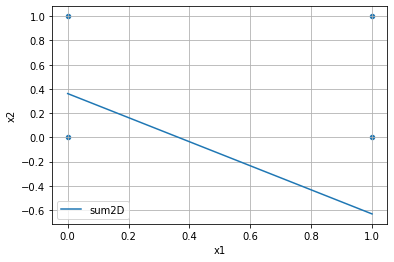

In [ ]:
ax=OR_df_tf[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
OR_df_tf[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
OR_df_tf['sum3D']=(model.get_weights()[0][0]*OR_df_tf['x1']
                    +model.get_weights()[0][1]*OR_df_tf['x2']
                    +model.get_weights()[1])
OR_df_tf

,x1,x2,sum2D,sum3D
0,0,0,0.361356,-1.430280
1,0,1,0.361356,2.527810
2,1,0,-0.632402,2.503105
3,1,1,-0.632402,6.461195


In [ ]:
OR_df_tf["y"]=OR_df_tf["sum3D"].map(lambda x: step(x))
OR_df_tf

,x1,x2,sum2D,sum3D,y
0,0,0,0.361356,-1.430280,0
1,0,1,0.361356,2.527810,1
2,1,0,-0.632402,2.503105,1
3,1,1,-0.632402,6.461195,1


###NANDゲート

In [ ]:
import tensorflow as tf
X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([1,0,0,0])

In [ ]:
X_tf

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int32)>

In [ ]:
X_tf[0].shape

TensorShape([2])

In [ ]:
t_tf

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 0, 0, 0], dtype=int32)>

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=X_tf[0].shape, units=1, activation='sigmoid')
])

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.5       ],
       [0.57827413],
       [0.24640836],
       [0.309562  ]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[-1.1178606 ],
        [ 0.31569266]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_tf, t_tf, epochs=1000, verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.81836015],
       [0.07392243],
       [0.06719059],
       [0.00127455]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[-4.1359444],
        [-4.0332184]], dtype=float32), array([1.5052767], dtype=float32)]

In [ ]:
import pandas as pd
X=pd.DataFrame(data=[[0,0],[0,1],[1,0],[1,1]],
               columns=['x1','x2']
               )

In [ ]:
NAND_df_tf=X.copy()

In [ ]:
model.get_weights()[1]

array([1.5052767], dtype=float32)

In [ ]:
a=-(model.get_weights()[0][0]/model.get_weights()[0][1])
a

array([-1.02547], dtype=float32)

In [ ]:
intercept=-(model.get_weights()[1][0]/model.get_weights()[0][1])
intercept

array([0.37321973], dtype=float32)

In [ ]:
NAND_df_tf['sum2D']=a*NAND_df_tf['x1']+intercept #2次元平面上に描写するためのデータ
NAND_df_tf

,x1,x2,sum2D
0,0,0,0.37322
1,0,1,0.37322
2,1,0,-0.65225
3,1,1,-0.65225


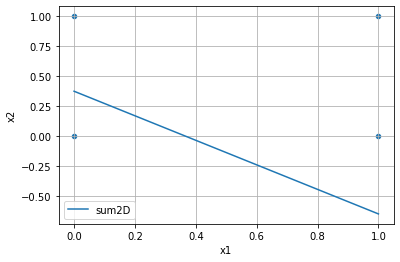

In [ ]:
ax=NAND_df_tf[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
NAND_df_tf[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
NAND_df_tf['sum3D']=(model.get_weights()[0][0]*OR_df_tf['x1']
                    +model.get_weights()[0][1]*OR_df_tf['x2']
                    +model.get_weights()[1])
NAND_df_tf

,x1,x2,sum2D,sum3D
0,0,0,0.37322,1.505277
1,0,1,0.37322,-2.527942
2,1,0,-0.65225,-2.630668
3,1,1,-0.65225,-6.663886


In [ ]:
NAND_df_tf["y"]=NAND_df_tf["sum3D"].map(lambda x: step(x))
NAND_df_tf

,x1,x2,sum2D,sum3D,y
0,0,0,0.37322,1.505277,1
1,0,1,0.37322,-2.527942,0
2,1,0,-0.65225,-2.630668,0
3,1,1,-0.65225,-6.663886,0


##多層のゲートの実装

###XORゲート

In [ ]:
import tensorflow as tf
X_tf=tf.constant([[0,0],[0,1],[1,0],[1,1]])
t_tf=tf.constant([0,1,1,0])

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=X_tf[0].shape, units=1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_tf, t_tf, epochs=1000, verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.49924156],
       [0.4999922 ],
       [0.4997698 ],
       [0.50052035]], dtype=float32)>

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Dense(input_shape=X_tf[0].shape, units=2, activation='sigmoid'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_tf, t_tf, epochs=30000, verbose=0)

In [ ]:
model(X_tf)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.00396905],
       [0.99459475],
       [0.9963599 ],
       [0.00340185]], dtype=float32)>

In [ ]:
model.get_weights()

[array([[ 6.9351773,  6.7770844],
        [-6.6683125, -6.9869533]], dtype=float32),
 array([ 3.3229976, -3.6074872], dtype=float32),
 array([[-11.884829],
        [ 12.37628 ]], dtype=float32),
 array([5.619316], dtype=float32)]

In [ ]:
XOR_df_tf=X.copy()

In [ ]:
XOR_df_tf['sum3D']=(model.get_weights()[0][0]*XOR_df_tf['x1']
                    +model.get_weights()[0][1]*XOR_df_tf['x2']
                    +model.get_weights()[1])
XOR_df_tf

ValueError: ignored

In [ ]:
for x in X.values:
    print(f"入力:{x}の時、出力は{XOR(x)}")

入力:[0 0]の時、出力は0
入力:[0 1]の時、出力は1
入力:[1 0]の時、出力は1
入力:[1 1]の時、出力は0



#PyTourchによる説明

##単層のゲートの実装

###ANDゲート

In [ ]:
import torch
X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([[0],[0],[0],[1]])

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid(), #sigmoidを入れるだけで大丈夫
)

In [ ]:
loss_fn = nn.BCELoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt.float())
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.0081],
        [0.1491],
        [0.1476],
        [0.7883]], grad_fn=<SigmoidBackward0>)

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[3.0565, 3.0685]])),
             ('0.bias', tensor([-4.8102]))])

####分離の確認

In [ ]:
a=(model.state_dict()['0.weight'][0][1]/model.state_dict()['0.weight'][0][0]).item()
a

1.0039030313491821

In [ ]:
intercept=(model.state_dict()['0.bias'].item()/model.state_dict()['0.weight'][0][0]).item()
intercept

-1.57375168800354

In [ ]:
import pandas as pd
X=pd.DataFrame(data=[[0,0],[0,1],[1,0],[1,1]],
               columns=['x1','x2'])
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
AND_df=X.copy()
AND_df['sum2D']=-a*AND_df['x1']-intercept #2次元平面上に描写するためのデータ
AND_df

,x1,x2,sum2D
0,0,0,1.573752
1,0,1,1.573752
2,1,0,0.569849
3,1,1,0.569849


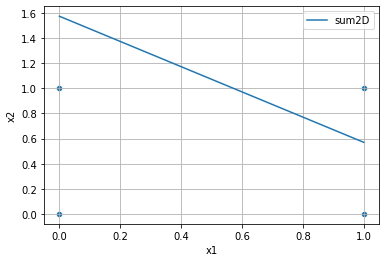

In [ ]:
ax=AND_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
AND_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
AND_df['sum3D']=model.state_dict()['0.weight'][0][0].item()*AND_df['x1']\
                   +model.state_dict()['0.weight'][0][1].item()*AND_df['x2']\
                   +model.state_dict()['0.bias'][0].item()
AND_df

,x1,x2,sum2D,sum3D
0,0,0,1.573752,-4.810239
1,0,1,1.573752,-1.741767
2,1,0,0.569849,-1.753696
3,1,1,0.569849,1.314776


In [ ]:
AND_df["y"]=AND_df['sum3D'].map(lambda x: step(x))
AND_df

,x1,x2,sum2D,sum3D,y
0,0,0,1.573752,-4.810239,0
1,0,1,1.573752,-1.741767,0
2,1,0,0.569849,-1.753696,0
3,1,1,0.569849,1.314776,1


####one-hotを使った分類

In [ ]:
model=nn.Sequential(
    nn.Linear(2,2)
)
loss_fn=nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt.float())
    loss = loss_fn(y,t_pt.long())
    loss.backward()
    optimizer.step()

ValueError: ignored

####PyTorchでのANDゲートの実装2

In [ ]:
import torch
import torch.nn.functional as f

X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([0,0,0,1])

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,2),
        nn.Softmax(dim=1),
)

In [ ]:
model(X_pt)

tensor([[0.6273, 0.3727],
        [0.6528, 0.3472],
        [0.5673, 0.4327],
        [0.5942, 0.4058]], grad_fn=<SoftmaxBackward0>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt.float())
    loss = loss_fn(y,t_pt.long())
    loss.backward()
    optimizer.step()

RuntimeError: ignored

In [ ]:
model(X_pt)

tensor([[0.9923, 0.0077],
        [0.8529, 0.1471],
        [0.8537, 0.1463],
        [0.2080, 0.7920]], grad_fn=<SoftmaxBackward0>)

In [ ]:
np.argmax(model(X_pt).detach().numpy(), axis=1)

array([0, 0, 0, 1])

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-1.4789, -2.0512],
                      [ 1.6152,  1.0495]])),
             ('0.bias', tensor([ 3.0609, -1.7970]))])

###ORゲートの実装

In [ ]:
import torch
X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([[0],[1],[1],[1]])

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid(),
)

In [ ]:
model(X_pt)

tensor([[0.3558],
        [0.2876],
        [0.4575],
        [0.3813]], grad_fn=<SigmoidBackward0>)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt)
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.1825],
        [0.9275],
        [0.9307],
        [0.9987]], grad_fn=<SigmoidBackward0>)

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[4.0969, 4.0483]])),
             ('0.bias', tensor([-1.4995]))])

####分離の確認

In [ ]:
a=-(model.state_dict()['0.weight'][0][0]/model.state_dict()['0.weight'][0][1]).item()
a

-1.0120131969451904

In [ ]:
intercept=(-model.state_dict()['0.bias'][0]/model.state_dict()['0.weight'][0][1]).item()
intercept

0.37040865421295166

In [ ]:
OR_df=X.copy()
OR_df['sum2D']=a*OR_df['x1']+intercept #2次元平面上に描写するためのデータ
OR_df

,x1,x2,sum2D
0,0,0,0.370409
1,0,1,0.370409
2,1,0,-0.641605
3,1,1,-0.641605


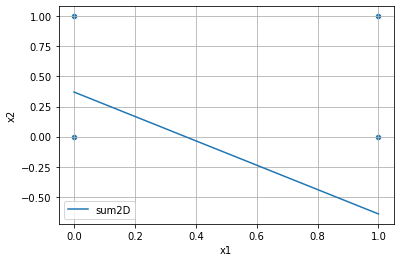

In [ ]:
ax=OR_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
OR_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )



これも直線の上のエリアが出力１、下のエリアが出力０となります。ANDゲートと同じようにstep関数を使って分類します。

In [ ]:
OR_df['sum3D']=model.state_dict()['0.weight'][0][0].item()*OR_df['x1']\
                   +model.state_dict()['0.weight'][0][1].item()*OR_df['x2']\
                   +model.state_dict()['0.bias'][0].item()
OR_df

,x1,x2,sum2D,sum3D_2,sum3D
0,0,0,0.370409,-1.499527,-1.499527
1,0,1,0.370409,2.548778,2.548778
2,1,0,-0.641605,2.597411,2.597411
3,1,1,-0.641605,6.645717,6.645717


In [ ]:
OR_df["y"]=OR_df['sum3D'].map(lambda x: step(x))
OR_df

,x1,x2,sum2D,sum3D_2,sum3D,y
0,0,0,0.370409,-1.499527,-1.499527,0
1,0,1,0.370409,2.548778,2.548778,1
2,1,0,-0.641605,2.597411,2.597411,1
3,1,1,-0.641605,6.645717,6.645717,1


####one-hotを使った分類

###NANDゲート

In [ ]:
import torch
X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([[1],[0],[0],[0]])

In [ ]:
from torch import nn
model=nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid(), #sigmoidを入れるだけで大丈夫
)

In [ ]:
loss_fn = nn.BCELoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    y=model(X_pt.float())
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.8031],
        [0.0754],
        [0.0770],
        [0.0017]], grad_fn=<SigmoidBackward0>)

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-3.8898, -3.9129]])),
             ('0.bias', tensor([1.4059]))])

#####分離の確認

In [ ]:
a=(model.state_dict()['0.weight'][0][1]/model.state_dict()['0.weight'][0][0]).item()
a

1.0059301853179932

In [ ]:
intercept=(model.state_dict()['0.bias'].item()/model.state_dict()['0.weight'][0][0]).item()
intercept

-0.3614269495010376

In [ ]:
NAND_df=X.copy()
NAND_df['sum2D']=-a*NAND_df['x1']-intercept #2次元平面上に描写するためのデータ
NAND_df

,x1,x2,sum2D
0,0,0,0.361427
1,0,1,0.361427
2,1,0,-0.644503
3,1,1,-0.644503


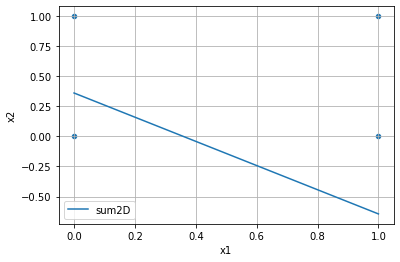

In [ ]:
ax=NAND_df[['x1','x2']].plot(kind='scatter', x='x1', y='x2',grid=True )
NAND_df[['x1','sum2D']].plot(ax=ax, kind='line', x='x1', y='sum2D',grid=True )

In [ ]:
NAND_df['sum3D']=model.state_dict()['0.weight'][0][0].item()*NAND_df['x1']\
                   +model.state_dict()['0.weight'][0][1].item()*NAND_df['x2']\
                   +model.state_dict()['0.bias'][0].item()
NAND_df

,x1,x2,sum2D,sum3D
0,0,0,0.361427,1.405886
1,0,1,0.361427,-2.507002
2,1,0,-0.644503,-2.483935
3,1,1,-0.644503,-6.396824


In [ ]:
NAND_df["y"]=NAND_df['sum3D'].map(lambda x: step(x))
NAND_df

,x1,x2,sum2D,sum3D,y
0,0,0,0.361427,1.405886,1
1,0,1,0.361427,-2.507002,0
2,1,0,-0.644503,-2.483935,0
3,1,1,-0.644503,-6.396824,0


##多層のゲートの実装

###XORゲート

次にXORゲートを作ります。

ORゲートの時の様にまずは入力$X$、教師データ$t$を作ります。

In [ ]:
import torch

X_pt=torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
t_pt=torch.Tensor([[0],[1],[1],[0]])

次にモデルを作ります。PyTorchでは、まず核となるモデルを作ります。それに、損失関数、誤差逆伝搬法、

In [ ]:
from torch import nn

model=nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
loss_fn=nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
model.train()
for epoch in range(30000):
    optimizer.zero_grad()
    y=model(X_pt)
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

先程と違い全く学習できていません。

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[1.3309e-07, 1.3349e-07]])),
             ('0.bias', tensor([-1.7856e-07]))])

中間層を入れます。学習回数も増やして学習します。

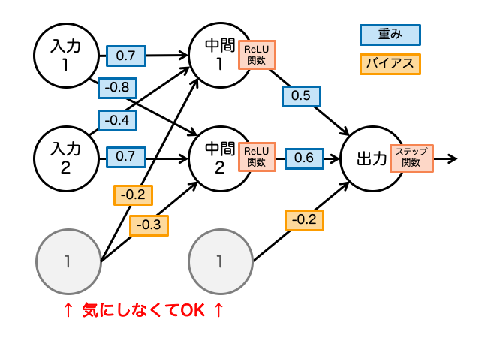

In [ ]:
from torch import nn
model=nn.Sequential(
    nn.Linear(2,2),
    nn.Sigmoid(),
    nn.Linear(2,1),
    nn.Sigmoid(),
)
loss_fn=nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
model.train()
for epoch in range(30000):
    optimizer.zero_grad()
    y=model(X_pt)
    loss = loss_fn(y,t_pt)
    loss.backward()
    optimizer.step()

In [ ]:
model(X_pt)

tensor([[0.0038],
        [0.9951],
        [0.9951],
        [0.0043]], grad_fn=<SigmoidBackward0>)